In [1]:
import pandas as pd
happiness2015 = pd.read_csv('World_Happiness_2015.csv')
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [2]:
happiness2015.tail(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [3]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


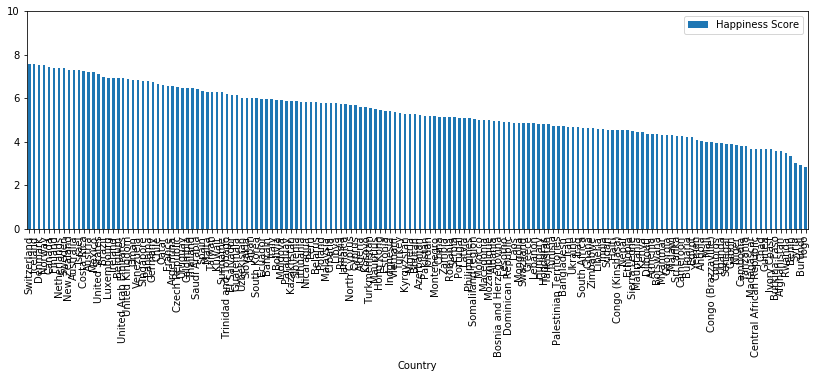

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
happiness2015.plot.bar(x='Country',y='Happiness Score', figsize=(14,4), ylim=(0,10))

In [5]:
happiness2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

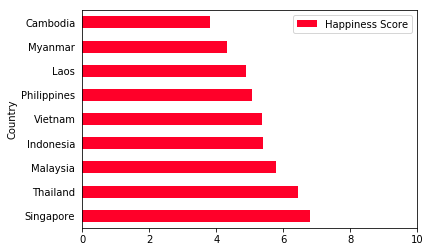

In [6]:
sou_asia = happiness2015[happiness2015['Region']=='Southeastern Asia']
sou_asia.plot(x='Country',y='Happiness Score', kind='barh', colormap='gist_rainbow', xlim=(0,10))
plt.tick_params(left=False)

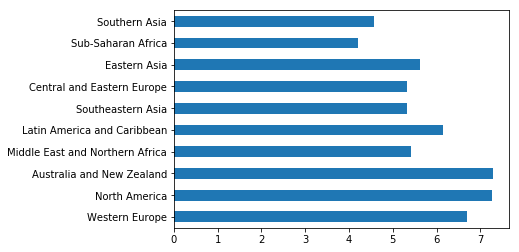

In [7]:
mean_happiness = {}
for region in happiness2015['Region'].unique():
    mean = happiness2015[happiness2015['Region']==region]['Happiness Score'].mean()
    mean_happiness[region] = mean
mean_happiness = pd.Series(mean_happiness)
mean_happiness.plot.barh()

In [8]:
# Get familiar with 'Groupby' function
happiness2015.groupby('Region').get_group('North America')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


In [9]:
happiness2015.groupby('Region').groups

{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'),
 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
              72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
             126, 129, 133],
            dtype='int64'),
 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'),
 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
              47,  50,  52,  56,  57,  64,  97, 104, 118],
            dtype='int64'),
 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
             106, 107, 109, 111, 134, 135, 155],
            dtype='int64'),
 'North America': Int64Index([4, 14], dtype='int64'),
 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'),
 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'),
 'Sub-Saharan

In [10]:
#happiness2015.boxplot('Happiness Score', by='Region',vert=False)
happiness2015.groupby('Region')['Happiness Score'].agg(['mean','sum','median','min','max'])

,mean,sum,median,min,max
Region,,,,,
Australia and New Zealand,7.285000,14.570,7.285,7.284,7.286
Central and Eastern Europe,5.332931,154.655,5.286,4.218,6.505
Eastern Asia,5.626167,33.757,5.729,4.874,6.298
Latin America and Caribbean,6.144682,135.183,6.149,4.518,7.226
Middle East and Northern Africa,5.406900,108.138,5.262,3.006,7.278
North America,7.273000,14.546,7.273,7.119,7.427
Southeastern Asia,5.317444,47.857,5.360,3.819,6.798
Southern Asia,4.580857,32.066,4.565,3.575,5.253
Sub-Saharan Africa,4.202800,168.112,4.272,2.839,5.477


In [11]:
happiness2015.groupby('Region').agg({'Happiness Score':['sum','mean'],
                                     'Family':['min','max']})

Happiness Score             Family         
                                            sum      mean      min      max
Region                                                                     
Australia and New Zealand                14.570  7.285000  1.30923  1.31967
Central and Eastern Europe              154.655  5.332931  0.38562  1.34043
Eastern Asia                             33.757  5.626167  0.94675  1.30060
Latin America and Caribbean             135.183  6.144682  0.74302  1.30477
Middle East and Northern Africa         108.138  5.406900  0.47489  1.22393
North America                            14.546  7.273000  1.24711  1.32261
Southeastern Asia                        47.857  5.317444  0.62736  1.26504
Southern Asia                            32.066  4.580857  0.30285  1.10395
Sub-Saharan Africa                      168.112  4.202800  0.00000  1.18468
Western Europe                          140.482  6.689619  0.89318  1.40223

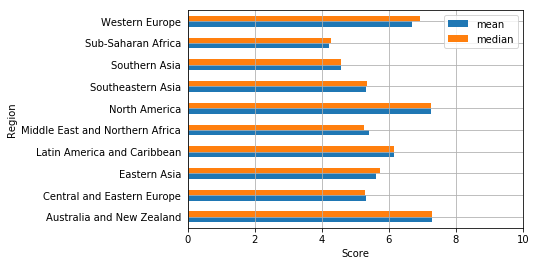

In [12]:
#Shorter way to use GroupBy for our dataset
happiness2015.groupby('Region')['Happiness Score'].agg(['mean','median']).plot.barh(xlim=(0,10), grid=True)
plt.xlabel('Score')
plt.tick_params(left=False)

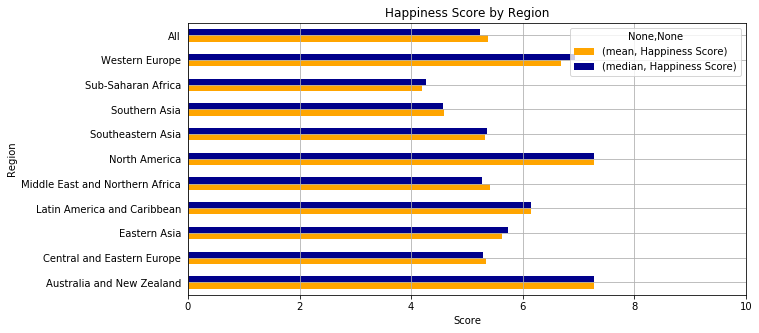

In [13]:
# Create a Pivot Table (like the Excel!!!)
mean_median_happiness = happiness2015.pivot_table(values='Happiness Score',
                                                  index='Region',
                                                  aggfunc=['mean','median'],
                                                  margins=True)
mean_median_happiness.plot.barh(xlim=(0,10), color=['orange','darkblue'], grid=True, title='Happiness Score by Region', figsize=(10,5))
plt.xlabel('Score')
plt.tick_params(left=False)

In [14]:
happiness2015.pivot_table(values=['Happiness Score','Family'],
                          index='Region',
                          aggfunc=['mean','max','min'],
                          margins=True)

mean                      max  \
                                   Family Happiness Score   Family   
Region                                                               
Australia and New Zealand        1.314450        7.285000  1.31967   
Central and Eastern Europe       1.053042        5.332931  1.34043   
Eastern Asia                     1.099427        5.626167  1.30060   
Latin America and Caribbean      1.104720        6.144682  1.30477   
Middle East and Northern Africa  0.920490        5.406900  1.22393   
North America                    1.284860        7.273000  1.32261   
Southeastern Asia                0.940468        5.317444  1.26504   
Southern Asia                    0.645321        4.580857  1.10395   
Sub-Saharan Africa               0.809085        4.202800  1.18468   
Western Europe                   1.247302        6.689619  1.40223   
All                              0.991046        5.375734  1.40223   

                                                     min                  
                                Happiness Score   Family Happiness Score  
Region                                                                    
Australia and New Zealand                 7.286  1.30923           7.284  
Central and Eastern Europe                6.505  0.38562           4.218  
Eastern Asia                              6.298  0.94675           4.874  
Latin America and Caribbean               7.226  0.74302           4.518  
Middle East and Northern Africa           7.278  0.47489           3.006  
North America                             7.427  1.24711           7.119  
Southeastern Asia                         6.798  0.62736           3.819  
Southern Asia                             5.253  0.30285           3.575  
Sub-Saharan Africa                        5.477  0.00000           2.839  
Western Europe                            7.587  0.89318           4.857  
All                                       7.587  0.00000           2.839

In [15]:
happiness2015.groupby('Region')[['Happiness Score','Family']].agg([np.min,np.max,np.mean])

Happiness Score                    Family  \
                                           amin   amax      mean     amin   
Region                                                                      
Australia and New Zealand                 7.284  7.286  7.285000  1.30923   
Central and Eastern Europe                4.218  6.505  5.332931  0.38562   
Eastern Asia                              4.874  6.298  5.626167  0.94675   
Latin America and Caribbean               4.518  7.226  6.144682  0.74302   
Middle East and Northern Africa           3.006  7.278  5.406900  0.47489   
North America                             7.119  7.427  7.273000  1.24711   
Southeastern Asia                         3.819  6.798  5.317444  0.62736   
Southern Asia                             3.575  5.253  4.580857  0.30285   
Sub-Saharan Africa                        2.839  5.477  4.202800  0.00000   
Western Europe                            4.857  7.587  6.689619  0.89318   

                                                    
                                    amax      mean  
Region                                              
Australia and New Zealand        1.31967  1.314450  
Central and Eastern Europe       1.34043  1.053042  
Eastern Asia                     1.30060  1.099427  
Latin America and Caribbean      1.30477  1.104720  
Middle East and Northern Africa  1.22393  0.920490  
North America                    1.32261  1.284860  
Southeastern Asia                1.26504  0.940468  
Southern Asia                    1.10395  0.645321  
Sub-Saharan Africa               1.18468  0.809085  
Western Europe                   1.40223  1.247302

In [16]:
happiness2016 = pd.read_csv('World_Happiness_2016.csv')
happiness2017 = pd.read_csv('World_Happiness_2017.csv')

In [17]:
happiness2015['Year']=2015

In [18]:
happiness2016['Year']=2016
happiness2016.head(3)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016


In [19]:
happiness2017['Year']=2017
happiness2017.head(3)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017


In [20]:
# Concatenate axis=0
pd.concat([happiness2015[:3][['Country','Happiness Rank','Year','Standard Error']],happiness2016[:3][['Country','Happiness Rank','Year']]], ignore_index=True)

D:\INSTALL\Empty\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Country,Happiness Rank,Standard Error,Year
0,Switzerland,1,0.03411,2015
1,Iceland,2,0.04884,2015
2,Denmark,3,0.03328,2015
3,Denmark,1,NaN,2016
4,Switzerland,2,NaN,2016
5,Iceland,3,NaN,2016


In [21]:
#Concatenate axis=1
pd.concat([happiness2015[:3][['Country','Happiness Rank','Year']],
           happiness2016[:5][['Country','Happiness Rank','Year']]],
          axis=1)

,Country,Happiness Rank,Year,Country,Happiness Rank,Year
0,Switzerland,1.0,2015.0,Denmark,1,2016
1,Iceland,2.0,2015.0,Switzerland,2,2016
2,Denmark,3.0,2015.0,Iceland,3,2016
3,NaN,NaN,NaN,Norway,4,2016
4,NaN,NaN,NaN,Finland,5,2016


In [22]:
# Merge df using df.merge() - how can be ['left','right','outer','inner']
pd.merge(left=happiness2015.iloc[2:5][['Country','Happiness Rank','Year']],
         right=happiness2016.iloc[2:5][['Country','Happiness Rank','Year']],
         on='Country',
         how='outer',
         suffixes=('_2015','_2016'))

,Country,Happiness Rank_2015,Year_2015,Happiness Rank_2016,Year_2016
0,Denmark,3.0,2015.0,NaN,NaN
1,Norway,4.0,2015.0,4.0,2016.0
2,Canada,5.0,2015.0,NaN,NaN
3,Iceland,NaN,NaN,3.0,2016.0
4,Finland,NaN,NaN,5.0,2016.0


In [23]:
# Merge on Indexes using pd.merge
pd.merge(left=happiness2015[2:5][['Country','Happiness Rank','Year']],
         right=happiness2016[2:6][['Country','Happiness Rank','Year']],
         left_index=True,
         right_index=True,
         how='left',
         suffixes=('_2015','_2016'))

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3,2016
3,Norway,4,2015,Norway,4,2016
4,Canada,5,2015,Finland,5,2016


In [24]:
import seaborn as sns

Text(0.5, 0, 'Happiness Score')

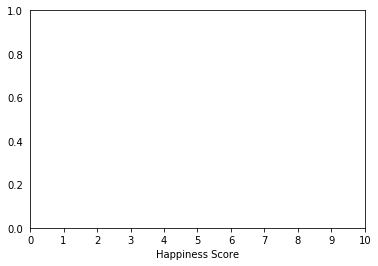

In [25]:
# Did world happiness increase, decrease, or stay about the same from 2015 to 2017?
happiness2017.rename(columns={'Happiness.Score':'Happiness Score'}, inplace=True)
merged = pd.concat([happiness2015[['Happiness Score','Year']], happiness2016[['Happiness Score','Year']], happiness2017[['Happiness Score','Year']]], ignore_index=True)
merged_pivot = merged.pivot_table(values='Happiness Score', index='Year', aggfunc='mean', margins=True)
#merged_pivot.plot.barh(xlim=(0,10), figsize=(8,4), title='Average Happiness Score by Year')
plt.tick_params(left=False)
plt.xticks(range(0,11))
plt.xlabel('Happiness Score')
#happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc='mean', margins=True).plot.barh()

**--> The World's Average Happiness Score stays the same through year (2015-2017)**

In [26]:
hp2015 = happiness2015[9:13][['Country','Happiness Rank','Happiness Score','Year']]
print(hp2015)
hp2016 = happiness2016[2:7][['Country','Happiness Rank','Happiness Score','Year']]
print(hp2016)
pd.merge(left=hp2015,right=hp2016, on='Country', how='left', suffixes=('_2015','_2016'))

       Country  Happiness Rank  Happiness Score  Year
9    Australia              10            7.284  2015
10      Israel              11            7.278  2015
11  Costa Rica              12            7.226  2015
12     Austria              13            7.200  2015
       Country  Happiness Rank  Happiness Score  Year
2      Iceland               3            7.501  2016
3       Norway               4            7.498  2016
4      Finland               5            7.413  2016
5       Canada               6            7.404  2016
6  Netherlands               7            7.339  2016


,Country,Happiness Rank_2015,Happiness Score_2015,Year_2015,Happiness Rank_2016,Happiness Score_2016,Year_2016
0,Australia,10,7.284,2015,NaN,NaN,NaN
1,Israel,11,7.278,2015,NaN,NaN,NaN
2,Costa Rica,12,7.226,2015,NaN,NaN,NaN
3,Austria,13,7.200,2015,NaN,NaN,NaN


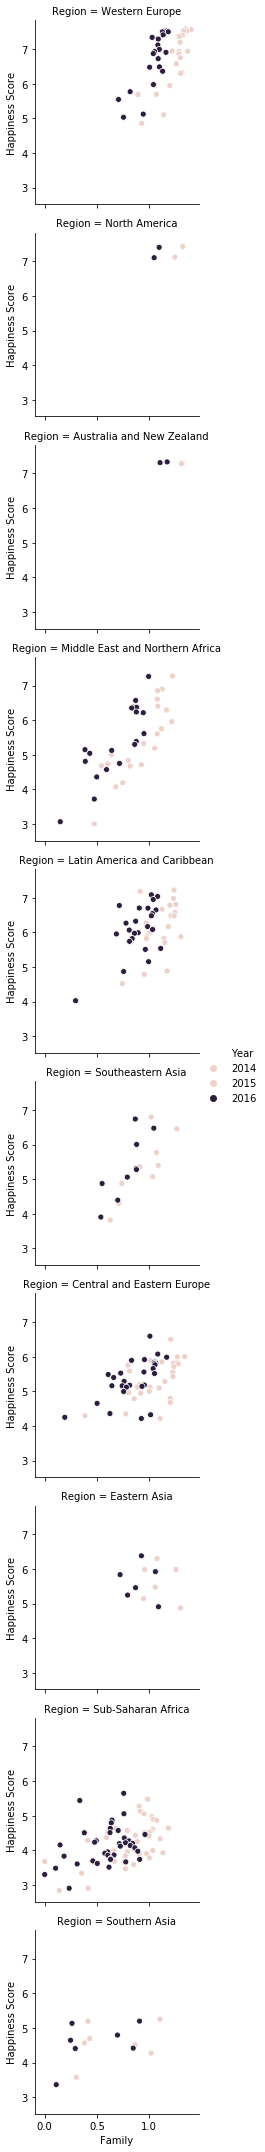

In [32]:
# Create Scatter Plot using seaborn.relplot()
merged = pd.concat([happiness2015, happiness2016], ignore_index=True, sort=False)
import seaborn as sns
sns.relplot(data=merged, x='Family', y='Happiness Score', row='Region', hue='Year',kind='scatter', height=3)

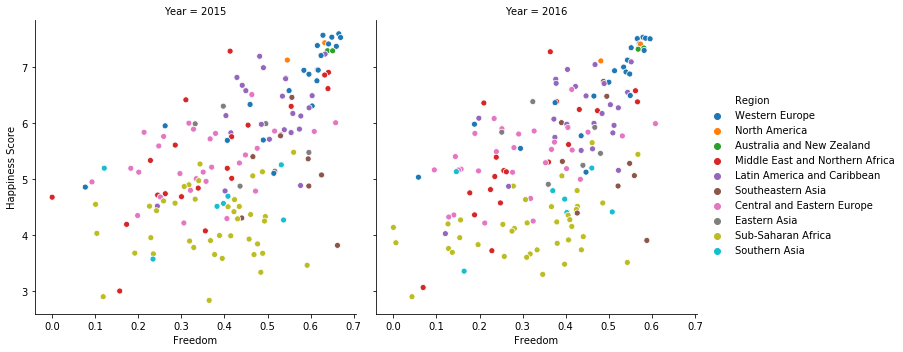

In [33]:
#Create Multiple Line Plots using seaborn.relplot()
sns.relplot(data=merged, x='Freedom', y='Happiness Score', hue='Region', col='Year', kind='scatter')

In [34]:
happiness2015.rename(columns={'Economy (GDP per Capita)': 'Economy',
                     'Health (Life Expectancy)': 'Health',
                     'Trust (Government Corruption)': 'Trust'}, inplace=True)
happiness2015.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015


In [35]:
# Transform data using series.map(func) or series.apply(func)
def label(number):
    if number > 1:
        return 'High'
    else:
        return 'Low'
test_1 = happiness2015['Economy'].map(label)
test_2 = happiness2015['Economy'].apply(label)
test_1.equals(test_2)

True

In [36]:
# Use df.applymap(func) to apply func to all df
factor_impact = happiness2015[['Economy','Family','Health','Freedom','Trust','Generosity']].applymap(label)
factor_impact.apply(pd.value_counts)

,Economy,Family,Health,Freedom,Trust,Generosity
High,66,89,2,NaN,NaN,NaN
Low,92,69,156,158.0,158.0,158.0


In [37]:
#Use df.apply(func) to apply func to all Series (with condition that is func only apply for Series)
def perc(col):
    return col.value_counts()/col.size*100
factor_impact.apply(perc)

,Economy,Family,Health,Freedom,Trust,Generosity
High,41.772152,56.329114,1.265823,NaN,NaN,NaN
Low,58.227848,43.670886,98.734177,100.0,100.0,100.0


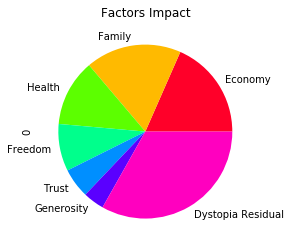

In [38]:
#Since the 'Happiness Score' are sum of all the factors' scores, we'll convert the factors' scores to percentages
factors=['Economy','Family','Health','Freedom','Trust','Generosity','Dystopia Residual']
def percent(col):
    return col/happiness2015['Happiness Score']*100
factors_percent = happiness2015[factors].apply(percent)
#factors_percent[:10].plot.barh(y=factors, stacked=True, legend=False, colormap='gist_rainbow', xlim=(0,100))
factors_percent.iloc[0].plot.pie(colormap='gist_rainbow', title='Factors Impact')

In [39]:
# Use pd.melt() to reshape the Df
melt = pd.melt(happiness2015, id_vars=['Country','Region','Happiness Rank','Happiness Score'],
        value_vars=['Economy','Family','Health','Freedom','Trust','Generosity','Dystopia Residual'])
melt['Percentage'] = round(melt['value']/melt['Happiness Score']*100,2)
melt.head(3)

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61


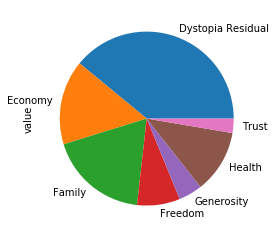

In [40]:
#melt.groupby('variable')['Percentage'].agg('mean').plot.pie()
melt.pivot_table(index='variable', values='value', aggfunc='mean').plot.pie(y='value', legend=False)

In [41]:
# Reshape the Df using df.pivot(index, columns, values)
melt_reshape = melt.pivot(index='Country', columns='variable', values='value')
melt_reshape.head(3)

variable,Dystopia Residual,Economy,Family,Freedom,Generosity,Health,Trust
Country,,,,,,,
Afghanistan,1.95210,0.31982,0.30285,0.23414,0.36510,0.30335,0.09719
Albania,1.89894,0.87867,0.80434,0.35733,0.14272,0.81325,0.06413
Algeria,2.43209,0.93929,1.07772,0.28579,0.07822,0.61766,0.17383


In [42]:
happiness2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')

In [43]:
world_dev = pd.read_csv('World_dev.csv')
world_dev.head(3)

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0


In [44]:
world_dev.columns

Index(['CountryCode', 'ShortName', 'TableName', 'LongName', 'Alpha2Code',
       'CurrencyUnit', 'SpecialNotes', 'Region', 'IncomeGroup', 'Wb2Code',
       'NationalAccountsBaseYear', 'NationalAccountsReferenceYear',
       'SnaPriceValuation', 'LendingCategory', 'OtherGroups',
       'SystemOfNationalAccounts', 'AlternativeConversionFactor',
       'PppSurveyYear', 'BalanceOfPaymentsManualInUse',
       'ExternalDebtReportingStatus', 'SystemOfTrade',
       'GovernmentAccountingConcept', 'ImfDataDisseminationStandard',
       'LatestPopulationCensus', 'LatestHouseholdSurvey',
       'SourceOfMostRecentIncomeAndExpenditureData',
       'VitalRegistrationComplete', 'LatestAgriculturalCensus',
       'LatestIndustrialData', 'LatestTradeData', 'LatestWaterWithdrawalData'],
      dtype='object')

In [45]:
world_dev['ShortName'].unique().shape

(247,)

In [46]:
# Merge 'happiness2015' & 'world_dev', keep the rows in 'happiness2015'
merged = pd.merge(left=happiness2015, right=world_dev, how='left',
                 left_on='Country', right_on='ShortName')
merged.rename(columns={'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}, inplace=True)
merged.columns

Index(['Country', 'Region_x', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual', 'Year', 'CountryCode', 'ShortName',
       'TableName', 'LongName', 'Alpha2Code', 'CurrencyUnit', 'SpecialNotes',
       'Region_y', 'IncomeGroup', 'Wb2Code', 'NationalAccountsBaseYear',
       'NationalAccountsReferenceYear', 'SnaPriceValuation', 'LendingCategory',
       'OtherGroups', 'SystemOfNationalAccounts',
       'AlternativeConversionFactor', 'PppSurveyYear',
       'BalanceOfPaymentsManualInUse', 'ExternalDebtReportingStatus',
       'SystemOfTrade', 'GovernmentAccountingConcept',
       'ImfDataDisseminationStandard', 'LatestPopulationCensus',
       'LatestHouseholdSurvey', 'IESurvey', 'VitalRegistrationComplete',
       'LatestAgriculturalCensus', 'LatestIndustrialData', 'LatestTradeData',
       'LatestWaterWithdrawalData'],
      dtype='object')

In [47]:
# Use series.apply(func) to split str from a str
def last_cur(cur):
    return str(cur).split()[-1]
merged['CurrencyUnit'].apply(last_cur)

0         franc
1         krona
2         krone
3         krone
4        dollar
5          Euro
6          Euro
7         krona
8        dollar
9        dollar
10       shekel
11        colon
12         Euro
13         peso
14       dollar
15         real
16         Euro
17         Euro
18         Euro
19       dirham
20     sterling
21        Omani
22       fuerte
23       dollar
24       balboa
25         Euro
26         peso
27        riyal
28         Euro
29         peso
         ...   
128        kyat
129        lari
130      kwacha
131       rupee
132       franc
133         lev
134       pound
135        rial
136      kwanza
137       franc
138         nan
139       franc
140    shilling
141       franc
142       franc
143       franc
144        riel
145    shilling
146      ariary
147       franc
148       franc
149       franc
150         nan
151       franc
152     afghani
153       franc
154       franc
155         nan
156       franc
157       franc
Name: CurrencyUnit, Leng

In [48]:
#merged['CurrencyUnit'].str.split().str[-1]
#merged['CurrencyUnit'].str.len()
#national_accounts = merged['SpecialNotes'].str.contains(r'[Nn]ational accounts', na=False, regex=True)
#merged[national_accounts]['SpecialNotes'].iloc[1]
#merged['SpecialNotes'].str.extract(r'([1-2][0-9][0-9][0-9])', expand=True)
#merged['SpecialNotes'].str.extract(r'([1-2][0-9]{3})', expand=True)
merged['IESurvey'].head()

0    Expenditure survey/budget survey (ES/BS), 2004
1           Integrated household survey (IHS), 2010
2                  Income tax registers (ITR), 2010
3                          Income survey (IS), 2010
4                    Labor force survey (LFS), 2010
Name: IESurvey, dtype: object

In [49]:
merged.set_index('Country')['IESurvey'].str.extractall(r'(?P<Years>[1-2][0-9]{3})')['Years'].value_counts()

2012    33
2010    28
2011    22
2013    12
2009     8
2005     6
2008     6
2007     4
2004     3
2006     1
1992     1
2000     1
1995     1
1999     1
2002     1
1998     1
2003     1
Name: Years, dtype: int64

In [50]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"
years = merged['IESurvey'].str.extractall(pattern)
years['Second_Year'] = years['First_Year'].str[:2] + years['Second_Year']
years[years['Second_Year'].notnull()]

,,First_Year,Second_Year
,match,,
77,0,2009,2010
79,0,2011,2012
80,0,2010,2011
93,0,2008,2009
94,0,2011,2012
100,0,2009,2010
112,0,2010,2011
114,0,2011,2012
116,0,2011,2012


In [51]:
merged['IncomeGroup'].unique()

array(['High income: OECD', 'Upper middle income', 'High income: nonOECD',
       nan, 'Lower middle income', 'Low income'], dtype=object)

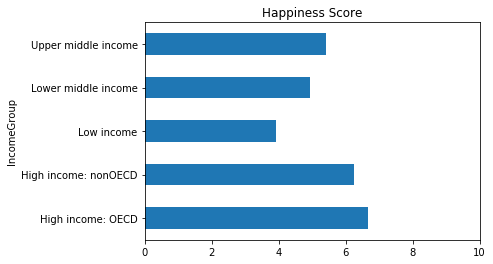

In [52]:
merged.pivot_table(index='IncomeGroup', values='Happiness Score', aggfunc='mean').plot.barh(legend=False, xlim=(0,10), title='Happiness Score')

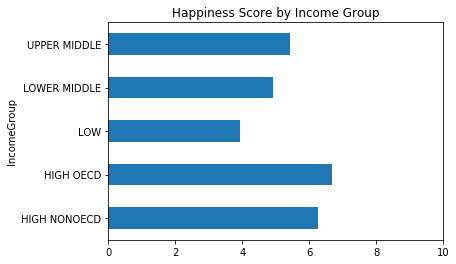

In [53]:
#'High income: OECD'.replace('income','').replace(': ','').upper()
merged['IncomeGroup'] = merged['IncomeGroup'].str.replace('income','').str.replace(': ','').str.upper().str.strip()
merged['IncomeGroup'].unique()
merged.pivot_table(index='IncomeGroup',values='Happiness Score', aggfunc='mean').plot.barh(xlim=(0,10),
                                                                                           title='Happiness Score by Income Group',
                                                                                           legend=False)

In [54]:
happiness2015.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015


In [55]:
merged.isnull().sum()

Country                            0
Region_x                           0
Happiness Rank                     0
Happiness Score                    0
Standard Error                     0
Economy                            0
Family                             0
Health                             0
Freedom                            0
Trust                              0
Generosity                         0
Dystopia Residual                  0
Year                               0
CountryCode                       13
ShortName                         13
TableName                         13
LongName                          13
Alpha2Code                        14
CurrencyUnit                      13
SpecialNotes                      65
Region_y                          13
IncomeGroup                       13
Wb2Code                           13
NationalAccountsBaseYear          13
NationalAccountsReferenceYear    110
SnaPriceValuation                 13
LendingCategory                   52
O

In [56]:
happiness2015 = pd.read_csv('wh_2015.csv')
happiness2016 = pd.read_csv('wh_2016.csv')
happiness2017 = pd.read_csv('wh_2017.csv')
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True, sort=True)
combined.isnull().sum()

Country                            0
Dystopia Residual                177
Dystopia.Residual                337
Economy (GDP per Capita)         177
Economy..GDP.per.Capita.         337
Family                            22
Freedom                           22
Generosity                        22
Happiness Rank                   177
Happiness Score                  177
Happiness.Rank                   337
Happiness.Score                  337
Health (Life Expectancy)         177
Health..Life.Expectancy.         337
Lower Confidence Interval        335
Region                           177
Standard Error                   334
Trust (Government Corruption)    177
Trust..Government.Corruption.    337
Upper Confidence Interval        335
Whisker.high                     337
Whisker.low                      337
Year                               0
dtype: int64

In [57]:
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+',' ').str.strip().str.upper()
happiness2017.columns

Index(['COUNTRY', 'HAPPINESS RANK', 'HAPPINESS SCORE', 'WHISKER HIGH',
       'WHISKER LOW', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'HEALTH LIFE EXPECTANCY', 'FREEDOM', 'GENEROSITY',
       'TRUST GOVERNMENT CORRUPTION', 'DYSTOPIA RESIDUAL', 'YEAR'],
      dtype='object')

In [58]:
#happiness2016.columns = happiness2016.columns.str.replace('(','').str.replace(')','').str.upper()
happiness2016.columns = happiness2016.columns.str.replace(r'[\(\)]','').str.strip().str.upper()
happiness2016.columns

Index(['COUNTRY', 'REGION', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'LOWER CONFIDENCE INTERVAL', 'UPPER CONFIDENCE INTERVAL',
       'ECONOMY GDP PER CAPITA', 'FAMILY', 'HEALTH LIFE EXPECTANCY', 'FREEDOM',
       'TRUST GOVERNMENT CORRUPTION', 'GENEROSITY', 'DYSTOPIA RESIDUAL',
       'YEAR'],
      dtype='object')

In [59]:
#happiness2015.columns = happiness2015.columns.str.replace('(','').str.replace(')','').str.upper()
happiness2015.columns = happiness2015.columns.str.replace(r'[\(\)]','').str.strip().str.upper()
happiness2015.columns

Index(['COUNTRY', 'REGION', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'STANDARD ERROR', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'HEALTH LIFE EXPECTANCY', 'FREEDOM', 'TRUST GOVERNMENT CORRUPTION',
       'GENEROSITY', 'DYSTOPIA RESIDUAL', 'YEAR'],
      dtype='object')

In [60]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True, sort=True)
combined.isnull().sum()

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
REGION                         177
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
dtype: int64

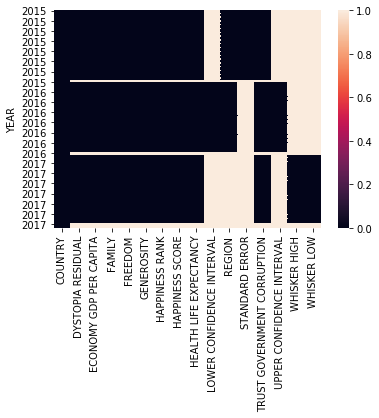

In [61]:
#sns.set_style('white')
sns.heatmap(combined.set_index('YEAR').isnull())

In [62]:
combined.loc[combined['YEAR']==2017,'REGION'].shape

(164,)

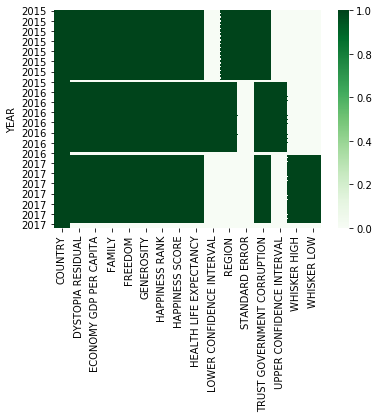

In [85]:
sns.heatmap(combined.set_index('YEAR').notnull(), cmap='Greens')

In [64]:
combined.sum(skipna=False)

COUNTRY                        SwitzerlandIcelandDenmarkNorwayCanadaFinlandNe...
DYSTOPIA RESIDUAL                                                            NaN
ECONOMY GDP PER CAPITA                                                       NaN
FAMILY                                                                       NaN
FREEDOM                                                                      NaN
GENEROSITY                                                                   NaN
HAPPINESS RANK                                                               NaN
HAPPINESS SCORE                                                              NaN
HEALTH LIFE EXPECTANCY                                                       NaN
LOWER CONFIDENCE INTERVAL                                                    NaN
STANDARD ERROR                                                               NaN
TRUST GOVERNMENT CORRUPTION                                                  NaN
UPPER CONFIDENCE INTERVAL   

In [65]:
combined.columns

Index(['COUNTRY', 'DYSTOPIA RESIDUAL', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'FREEDOM', 'GENEROSITY', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'HEALTH LIFE EXPECTANCY', 'LOWER CONFIDENCE INTERVAL', 'REGION',
       'STANDARD ERROR', 'TRUST GOVERNMENT CORRUPTION',
       'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW', 'YEAR'],
      dtype='object')